In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Data source: "NFL Passing Statistics (2001-2023)", https://www.kaggle.com/datasets/rishabjadhav/nfl-passing-statistics-2001-2023

In [28]:
# Imports dataset
df_nfl = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/passing_cleaned.csv', header=0, 
                     index_col=0)

In [29]:
df_nfl.head()

,Player,Tm,Age,G,GS,Cmp,Att,Cmp%,Yds,TD,...,AY/A,Y/C,Y/G,Rate,Sk,Yds-s,Sk%,NY/A,ANY/A,Year
0,Kurt Warner,STL,30,16,16,375,546,68.7,4830,36,...,8.4,12.9,301.9,101.4,38,233,6.5,7.87,7.41,2001
1,Peyton Manning,IND,25,16,16,343,547,62.7,4131,26,...,6.6,12.0,258.2,84.1,29,232,5.0,6.77,5.88,2001
2,Brett Favre,GNB,32,16,16,314,510,61.6,3921,32,...,7.6,12.5,245.1,94.1,22,151,4.1,7.09,7.02,2001
3,Aaron Brooks,NOR,25,16,16,312,558,55.9,3832,26,...,6.0,12.3,239.5,76.4,50,330,8.2,5.76,4.99,2001
4,Rich Gannon,OAK,36,16,16,361,549,65.8,3828,27,...,7.2,10.6,239.3,95.5,27,155,4.7,6.38,6.61,2001


In [30]:
# Drops unneeded columns
df_nfl.drop(['GS', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Yds-s', 'NY/A', 'ANY/A'], axis=1, inplace=True)

In [31]:
# Data types of relevant columns
df_nfl.dtypes

Player     object
Tm         object
Age         int64
G           int64
Cmp         int64
Att         int64
Cmp%      float64
Yds         int64
TD          int64
TD%       float64
Int         int64
Int%      float64
1D          int64
Rate      float64
Sk          int64
Sk%       float64
Year        int64
dtype: object

In [32]:
# Descriptive statistics on dataset
df_nfl.describe()

,Age,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Rate,Sk,Sk%,Year
count,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000,2350.000000
mean,28.131489,10.342979,106.064681,171.169362,55.620255,1204.897021,7.322979,7.099319,4.600426,4.651447,58.080000,77.791830,11.750638,5.616128,2011.913191
std,4.356133,5.632477,133.591048,210.308691,27.749202,1532.527920,10.252285,19.430258,5.672478,14.694197,74.834123,31.949639,14.504853,7.312900,6.795382
min,21.000000,1.000000,0.000000,1.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000
25%,25.000000,5.000000,1.000000,2.000000,50.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,56.575000,0.000000,0.000000,2006.000000
50%,27.000000,12.000000,27.000000,48.000000,60.200000,295.000000,1.000000,3.000000,2.000000,1.900000,14.000000,80.050000,4.000000,5.000000,2012.000000
75%,31.000000,16.000000,207.750000,344.500000,66.700000,2331.000000,13.000000,4.800000,8.000000,3.500000,112.000000,95.800000,23.000000,7.700000,2018.000000
max,45.000000,17.000000,490.000000,733.000000,100.000000,5477.000000,55.000000,100.000000,30.000000,100.000000,291.000000,158.300000,76.000000,80.000000,2023.000000


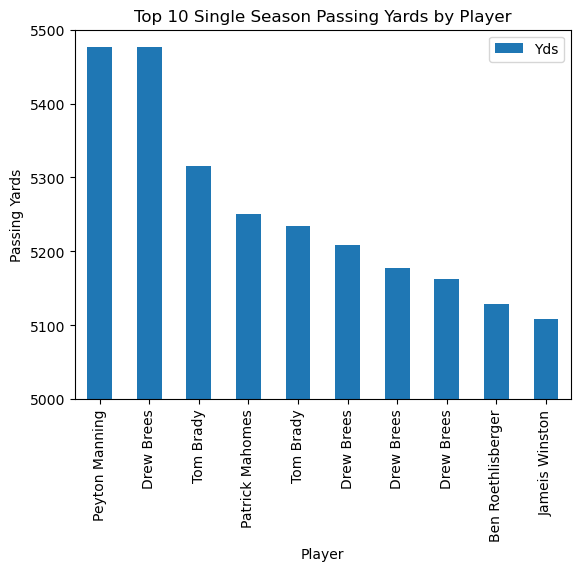

In [33]:
# Top 10 Single Season Passing Yards by Player (within timeframe of dataset)
top_10_yds = df_nfl.nlargest(10, 'Yds')
top_10_yds.plot(kind='bar',x='Player', y='Yds')
plt.xlabel('Player')
plt.ylabel('Passing Yards')
plt.title('Top 10 Single Season Passing Yards by Player')
plt.ylim(5000, 5500) 
plt.show()

In [34]:
# Returns the maximum Passing Yards in a single season
max_yds = df_nfl['Yds'].max()
print(max_yds)

5477


In [35]:
# Returns the index of the maximum Passing Yards row
idx_max_yds = df_nfl['Yds'].idxmax()
print(idx_max_yds)

1268


In [36]:
# Returns the year for maximum Passing Yards row
max_yds_yr = df_nfl.loc[1268, 'Year']
print(max_yds_yr)

2013


In [37]:
# Returns the player with maximum passing yards in a single season
max_yds_plyr = df_nfl.loc[1268, 'Player']
print(max_yds_plyr)

Peyton Manning


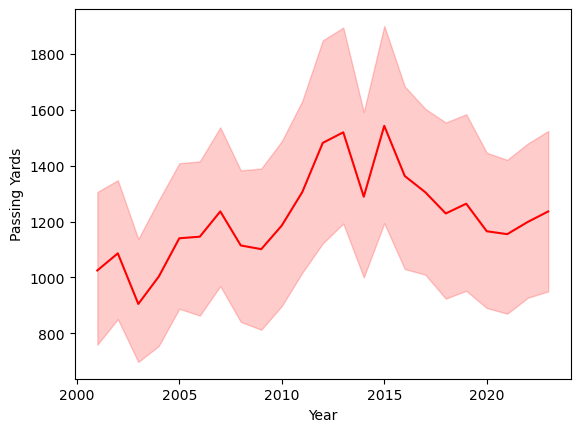

In [38]:
# Passing Yards over time
sns.lineplot(x='Year', y='Yds', data = df_nfl, color = 'Red')
plt.ylabel('Passing Yards')
plt.show()

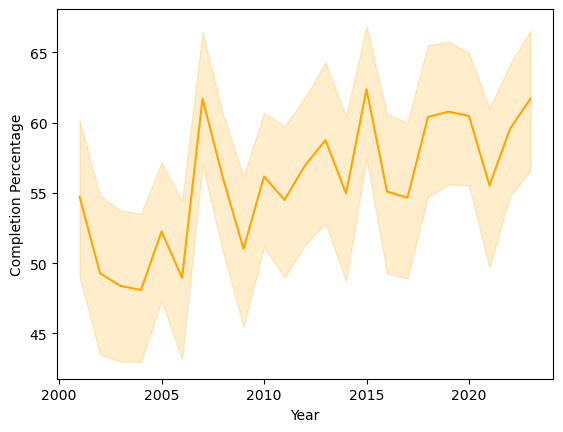

In [39]:
# Completion Percentage over time
sns.lineplot(x='Year', y='Cmp%', data = df_nfl, color = 'Orange')
plt.ylabel('Completion Percentage')
plt.show()

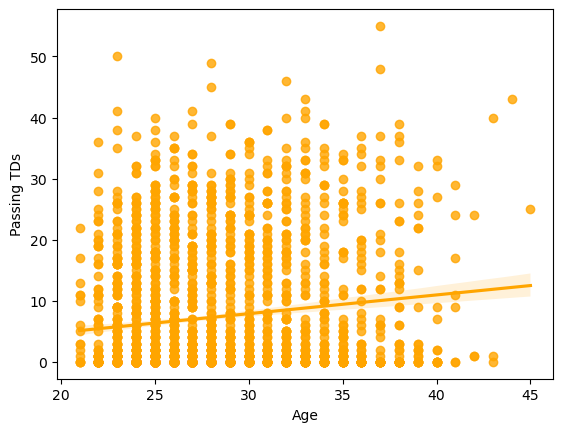

In [40]:
# Regression plot with 'Age' on x-axis and 'Passing TDs' on y-axis
sns.regplot(x='Age', y='TD', data = df_nfl, color = 'Orange')
plt.ylabel('Passing TDs')
plt.show()

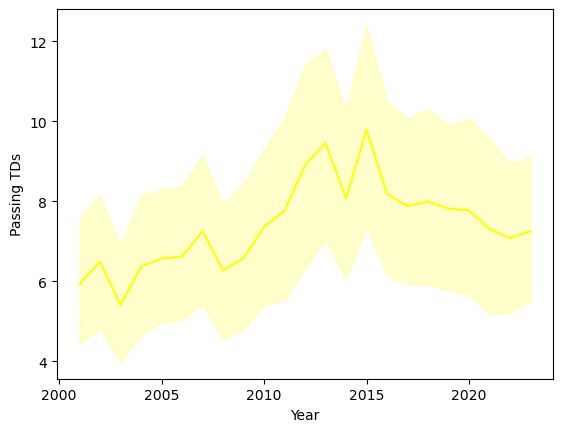

In [41]:
# Passing TDs over time
sns.lineplot(x='Year', y='TD', data = df_nfl, color = 'Yellow')
plt.ylabel('Passing TDs')
plt.show()

In [42]:
# Creates x and y variables
x = df_nfl[['Age', 'G', 'Cmp', 'Att', 'Yds', 'Rate', 'Int', 'Sk']]
y = df_nfl['TD']

In [43]:
# Splits dataset into training portion and testing portion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [44]:
# Feature scaling for input variables
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
print(x_train)

[[-0.03984093  0.83096271  1.46953714 ...  0.83288306  0.61137355
   1.39957648]
 [-0.27101673 -1.6538065  -0.78345201 ... -1.09721049 -0.81289197
  -0.80416945]
 [ 2.04074119  1.00844623  2.0723436  ...  0.45182125  1.14547312
   2.43258238]
 ...
 [-0.50219252  1.00844623  1.32637061 ...  0.07075944  1.85760588
   2.36371532]
 [ 0.19133486  1.00844623 -0.78345201 ...  1.39673061 -0.81289197
  -0.80416945]
 [-0.50219252 -1.12135596 -0.37655765 ... -0.70375643 -0.2787924
  -0.25323297]]


In [45]:
# Builds linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [46]:
# Coefficients table
coeff_df_nfl = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_nfl

,Coefficient
Age,-0.070089
G,0.084958
Cmp,1.076189
Att,-6.525659
Yds,16.847391
Rate,0.210667
Int,-0.720536
Sk,-1.211579


In [47]:
# Makes predictions on the test set
y_pred = regressor.predict(x_test)

In [48]:
# Compares Actual Passing TDs against Predicted Passing TDs
df_actual_vs_predicted = pd.DataFrame({'Actual Passing TDs': y_test, 'Predicted Passing TDs': y_pred})
df_actual_vs_predicted['Predicted Passing TDs'].clip(lower=0, inplace=True)
print(df_actual_vs_predicted.head(20).to_string(index=False))

 Actual Passing TDs  Predicted Passing TDs
                  0               0.024437
                  3               3.099041
                  0               0.000000
                 38              33.996215
                  4               1.763995
                  0               0.000000
                 20              24.552418
                 26              21.917321
                 33              28.353420
                  1               1.243628
                 18              12.623682
                 16              23.380117
                  3               5.251796
                 19              24.668734
                  6               6.294759
                 15              19.328604
                  1               0.320203
                  0               0.579659
                 23              28.099215
                 41              33.135302


In [49]:
# Rounds predicted values to nearest Passing TD
df_actual_vs_predicted['Predicted Passing TDs'] = df_actual_vs_predicted['Predicted Passing TDs'].round(0).astype(int)
print(df_actual_vs_predicted.head(20).to_string(index=False))

 Actual Passing TDs  Predicted Passing TDs
                  0                      0
                  3                      3
                  0                      0
                 38                     34
                  4                      2
                  0                      0
                 20                     25
                 26                     22
                 33                     28
                  1                      1
                 18                     13
                 16                     23
                  3                      5
                 19                     25
                  6                      6
                 15                     19
                  1                      0
                  0                      1
                 23                     28
                 41                     33


Evaluates the model

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.449704053976364
Mean Squared Error: 5.601182687399076
Root Mean Squared Error: 2.3666817883693354


In [51]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.9475993112047426


In [52]:
print('Intercept:', regressor.intercept_)

Intercept: 7.270212765957447
